In [193]:
library(dplyr)
library(rstan)
library(ggplot2)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 7)

source("bbvi_simplemix.R")

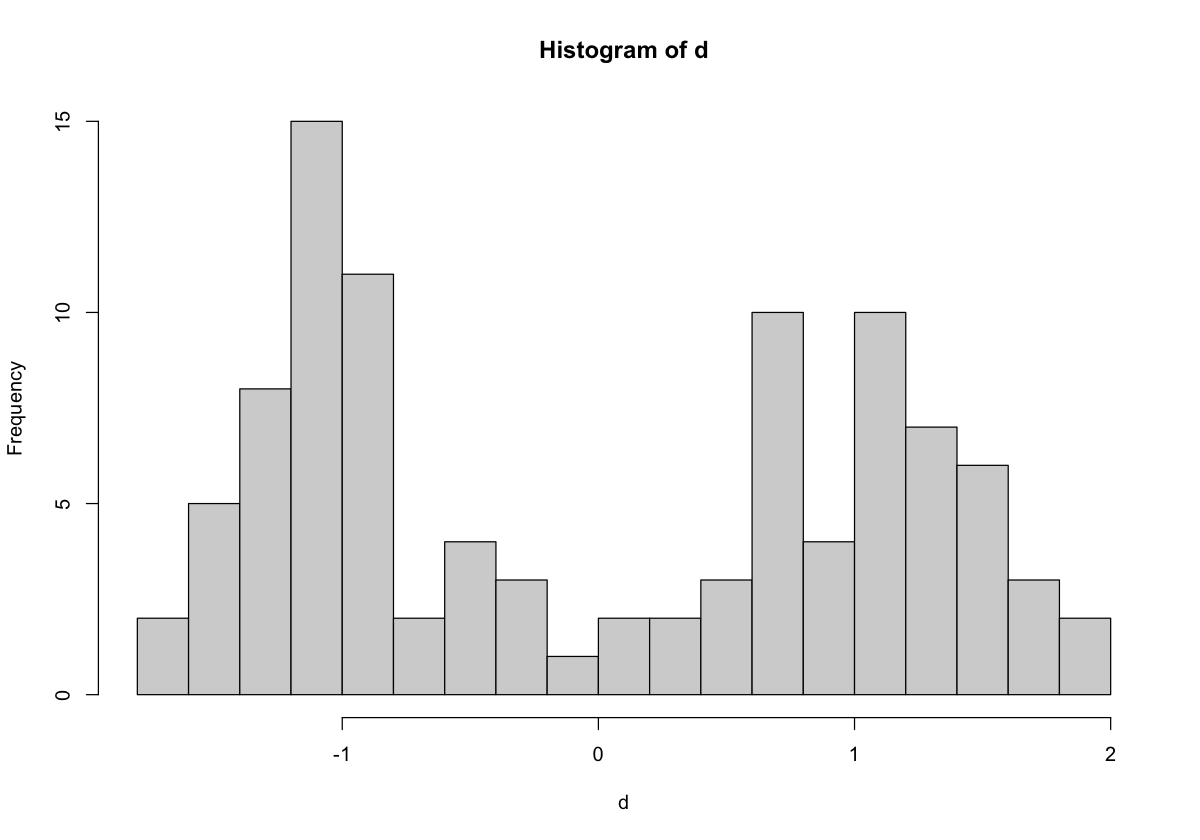

In [158]:
set.seed(923)
d <- generate_mixture(100, c(0.5, 0.5), means=c(-1, 1), vars=c(0.16, 0.16))

prior_list = list(
    tausq = 25,
    sigmasq = 1
)

# Generate Random Starts
phi <- t(sapply(d, function(x){
        y <- runif(2)
        return(y/sum(y))
    }))

m <- c(0,0)

ssq <- c(2,2)

params <- data.frame(
    param = c(paste0("z", 1:nrow(phi)),"m","ssq"),
    rbind(
        phi,
        m,
        ssq
    )
)

rownames(params) <- NULL

par(bg = "white")
hist(d, breaks = 20)

In [197]:
trace.naive <- simplemix.bbvi(data=d, K=2, priors = prior_list, maxiter=1000, 
                            init=params, learn_rate = rate_adagrad(0.1), mc_size=100, 
                            method="Naive", verbose=TRUE)

Doing Black Box Variational Inference With Method Naive



BBVI-Naive: Iteration 100 | Means at -0.12, 0.11 | Variances at 0.56, 0.52 | ELBO: -245.61

BBVI-Naive: Iteration 200 | Means at -0.05, 0.17 | Variances at 0.1, 0.19 | ELBO: -226.59

BBVI-Naive: Iteration 300 | Means at -0.13, 0.16 | Variances at 0.11, 0.09 | ELBO: -227.19

BBVI-Naive: Iteration 400 | Means at -0.18, 0.04 | Variances at 0.07, 0.05 | ELBO: -224.18

BBVI-Naive: Iteration 500 | Means at -0.11, -0.1 | Variances at 0.11, 0.07 | ELBO: -225.72

BBVI-Naive: Iteration 600 | Means at -0.14, 0.07 | Variances at 0.11, 0.07 | ELBO: -224.6

BBVI-Naive: Iteration 700 | Means at -0.07, 0.11 | Variances at 0.08, 0.07 | ELBO: -225.19

BBVI-Naive: Iteration 800 | Means at -0.01, 0.1 | Variances at 0.08, 0.04 | ELBO: -224.29

BBVI-Naive: Iteration 900 | Means at -0.04, 0.05 | Variances at 0.08, 0.04 | ELBO: -223.93

BBVI-Naive: Iteration 1000 | Means at -0.11, 0.07 | Variances at 0.04, 0.04 | ELBO: -222.91



In [198]:
trace.jsp <- simplemix.bbvi(data=d, K=2, priors = prior_list, maxiter=1000, 
                            init=params, learn_rate = rate_adagrad(0.1), mc_size=100, 
                            method="JS+", verbose=TRUE)

Doing Black Box Variational Inference With Method JS+



BBVI-JS+: Iteration 100 | Means at -0.14, 0.1 | Variances at 0.88, 1 | ELBO: -212.01

BBVI-JS+: Iteration 200 | Means at -0.07, 0.12 | Variances at 0.69, 0.72 | ELBO: -193.09

BBVI-JS+: Iteration 300 | Means at -0.07, 0.11 | Variances at 0.59, 0.65 | ELBO: -191.04

BBVI-JS+: Iteration 400 | Means at -0.1, 0.08 | Variances at 0.56, 0.61 | ELBO: -186.72

BBVI-JS+: Iteration 500 | Means at -0.11, 0.12 | Variances at 0.56, 0.57 | ELBO: -195.57

BBVI-JS+: Iteration 600 | Means at -0.11, 0.14 | Variances at 0.57, 0.57 | ELBO: -186.17

BBVI-JS+: Iteration 700 | Means at -0.1, 0.14 | Variances at 0.54, 0.57 | ELBO: -188.79

BBVI-JS+: Iteration 800 | Means at -0.1, 0.14 | Variances at 0.51, 0.55 | ELBO: -190.97

BBVI-JS+: Iteration 900 | Means at -0.09, 0.14 | Variances at 0.51, 0.55 | ELBO: -190.74

BBVI-JS+: Iteration 1000 | Means at -0.09, 0.14 | Variances at 0.47, 0.54 | ELBO: -185.56



In [199]:
trace.rbl <- simplemix.bbvi(data=d, K=2, priors=prior_list, maxiter=1000, 
                            init=params, learn_rate = rate_adagrad(0.1), mc_size=100, 
                            method="RB", verbose=TRUE)

Doing Black Box Variational Inference With Method RB

BBVI-RB: Iteration 100 | Means at -0.07, 0.07 | Variances at 0.29, 0.36 | ELBO: -175.35

BBVI-RB: Iteration 200 | Means at -0.04, 0.16 | Variances at 0.04, 0.08 | ELBO: -161.86

BBVI-RB: Iteration 300 | Means at -0.14, 0.16 | Variances at 0.06, 0.07 | ELBO: -161.56

BBVI-RB: Iteration 400 | Means at -0.2, 0.09 | Variances at 0.05, 0.03 | ELBO: -161.06

BBVI-RB: Iteration 500 | Means at -0.13, 0.01 | Variances at 0.06, 0.05 | ELBO: -162.16

BBVI-RB: Iteration 600 | Means at -0.16, 0.17 | Variances at 0.06, 0.05 | ELBO: -160.83

BBVI-RB: Iteration 700 | Means at -0.12, 0.2 | Variances at 0.04, 0.04 | ELBO: -160.68

BBVI-RB: Iteration 800 | Means at -0.1, 0.2 | Variances at 0.03, 0.03 | ELBO: -160.96

BBVI-RB: Iteration 900 | Means at -0.14, 0.15 | Variances at 0.04, 0.03 | ELBO: -160.96

BBVI-RB: Iteration 1000 | Means at -0.2, 0.18 | Variances at 0.03, 0.03 | ELBO: -160.45



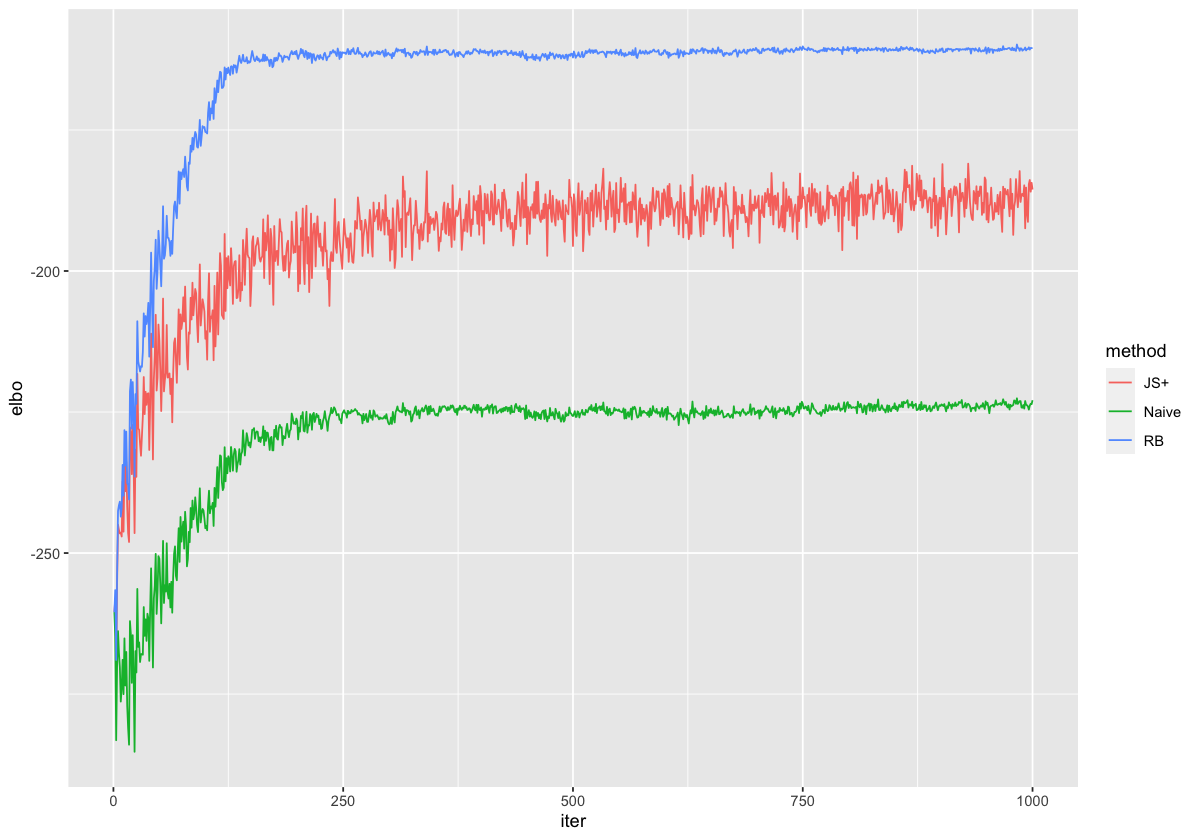

In [200]:
rbind(
    cbind(method = "Naive", trace.naive$elbo),
    cbind(method = "JS+", trace.jsp$elbo),
    cbind(method = "RB", trace.rbl$elbo)
 ) %>%
    ggplot(aes(x=iter, y=elbo, color=method)) +
    geom_line()

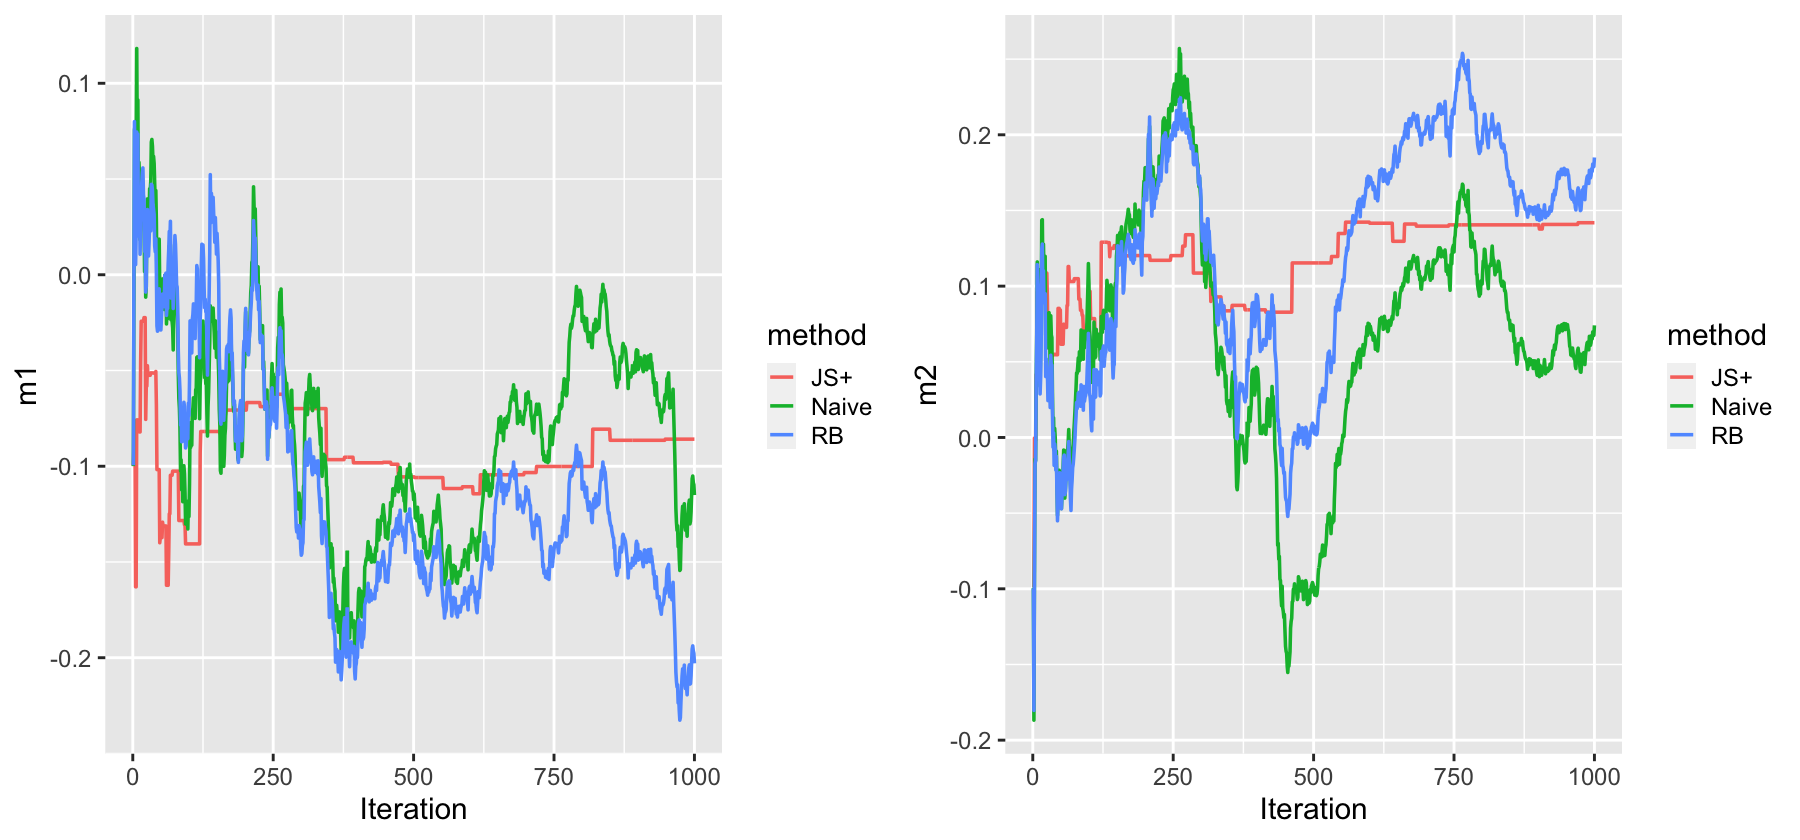

In [211]:
p1 <- rbind(
    cbind(method = "Naive", trace.naive$paths),
    cbind(method = "JS+", trace.jsp$paths),
    cbind(method = "RB", trace.rbl$paths)
 ) %>%
    filter(param == "m") %>%
    ggplot(aes(x=iter, y=X1, color=method)) +
    geom_line(linewidth=1) +
    theme_grey(base_size = 18) +
    labs(x = "Iteration", y="m1")

p2 <- rbind(
    cbind(method = "Naive", trace.naive$paths),
    cbind(method = "JS+", trace.jsp$paths),
    cbind(method = "RB", trace.rbl$paths)
 ) %>%
    filter(param == "m") %>%
    ggplot(aes(x=iter, y=X2, color=method)) +
    geom_line(linewidth=1) +
    theme_grey(base_size = 18) +
    labs(x = "Iteration", y="m2")

options(repr.plot.width = 15, repr.plot.height = 7)
grid.arrange(p1, p2, nrow = 1)

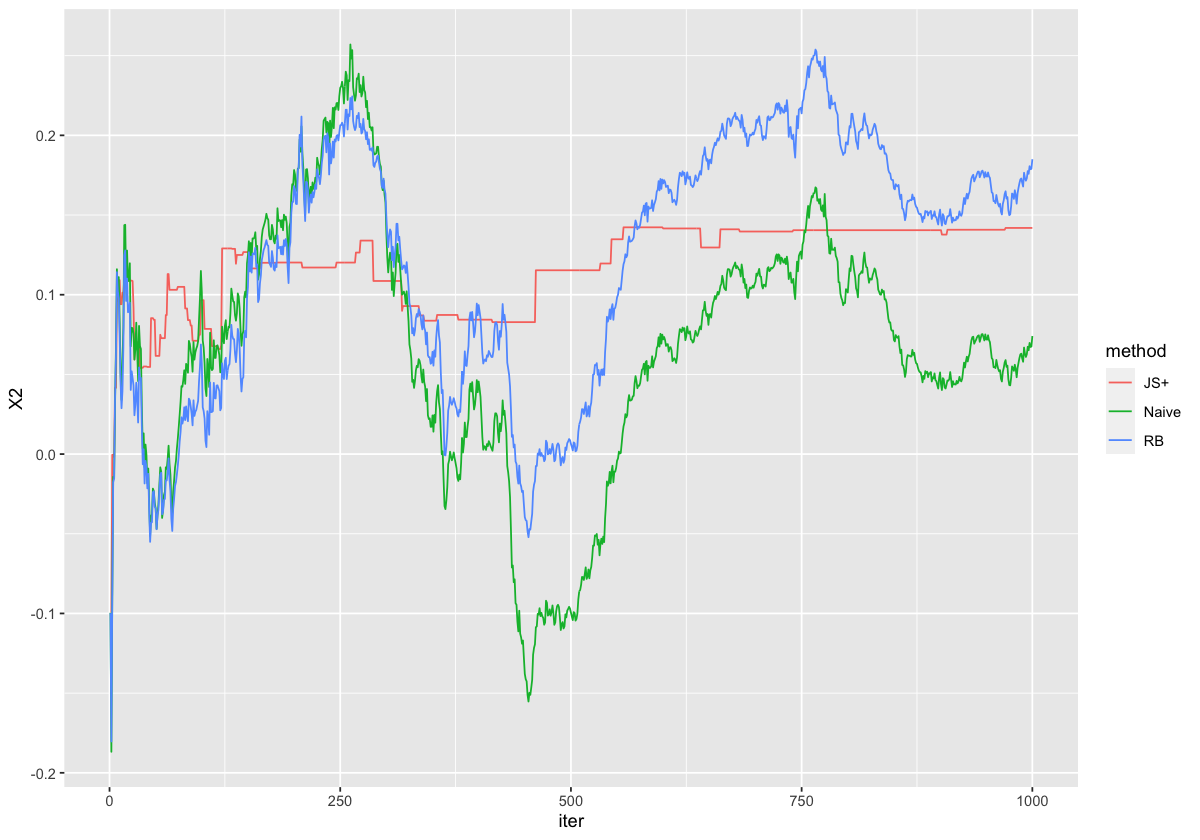

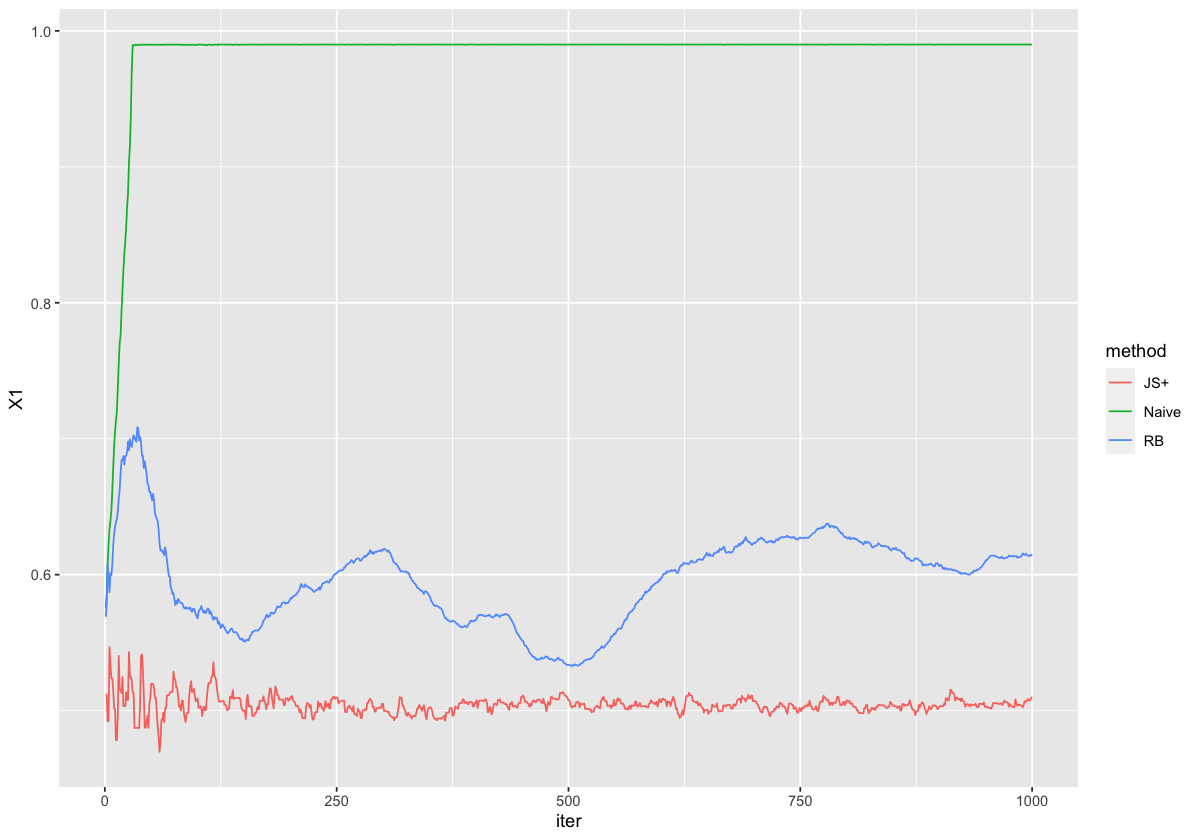

In [203]:
rbind(
    cbind(method = "Naive", trace.naive$paths),
    cbind(method = "JS+", trace.jsp$paths),
    cbind(method = "RB", trace.rbl$paths)
 ) %>%
    filter(param == "z1") %>%
    ggplot(aes(x=iter, y=X1, color=method)) +
    geom_line()